Train Accuracy: 0.861904761904762
----------------------------------------------------------------------------------------------------
Test Accuracy: 0.7222222222222222
----------------------------------------------------------------------------------------------------


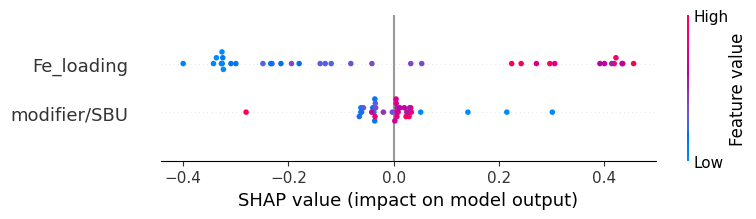

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load experimental features
features = pd.read_csv("agent/data/all_targets.csv")[['Fe_loading', 'modifier/SBU']]
target = pd.read_csv("agent/data/all_targets.csv")[['yield_cla']]

# Initialize model
model_cla = RandomForestClassifier(n_estimators=500, max_depth=2, max_features=None,random_state=42, n_jobs=16)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize list to hold SHAP values
shap_values_list = []
train_accuracy_all = []
test_accuracy_all = []
# Perform Leave-One-Out and calculate SHAP values
for train_index, test_index in loo.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    model_cla.fit(X_train, y_train.values.ravel())
    
    y_train_pred = model_cla.predict(X_train)
    # Predict on the test set
    y_pred = model_cla.predict(X_test)
    # Evaluate the model
    train_acc = accuracy_score(y_train, y_train_pred)
    
    test_acc = accuracy_score(y_test, y_pred)
    
    train_accuracy_all.append(train_acc)
    test_accuracy_all.append(test_acc)

    
    # Use SHAP to calculate the SHAP values for the test sample
    explainer = shap.TreeExplainer(model_cla)
    shap_values = explainer.shap_values(X_test)
    
    # Store SHAP values for the test sample
    shap_values_list.append(shap_values)


print("Train Accuracy:", np.mean(train_accuracy_all))
print("-"*100)
print("Test Accuracy:", np.mean(test_accuracy_all))
print("-"*100)

# Flatten list of SHAP values (since we calculated them for binary classification)
shap_values_array = np.concatenate(shap_values_list, axis=0)

# Plot the SHAP values for one test sample (as an example)

shap.summary_plot(shap_values_array[:,:,1], features)

# test_sample_index = 0  # Change this to any index you want to visualize
# # Plot the SHAP values for a single test observation, you may need to loop through to find a particular sample's SHAP value
# shap.force_plot(explainer.expected_value[1], shap_values_array[1][test_sample_index], features.iloc[test_sample_index], matplotlib=True)
# plt.show()

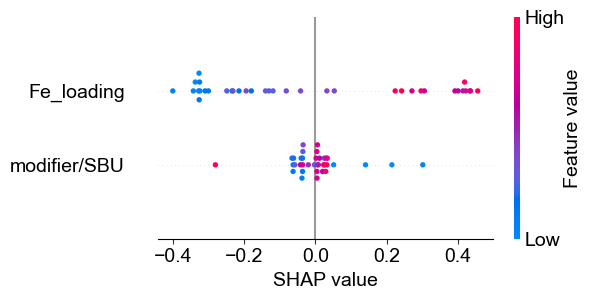

In [ ]:
from shap.plots import colors
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm
font_path = "ARIAL.TTF"  # Update the path to your font file
font_prop = FontProperties(fname=font_path, size=15)
shap.summary_plot(shap_values_array[:,:,1], features,show=False,plot_size=(6,3),color_bar=False)

ax = plt.gca()
# Adjust scatter size by updating the collections
for collection in ax.collections:
    if hasattr(collection, 'set_sizes'):
        # Adjust scatter point size (currently fitting imaginary variable fontsize)
        collection.set_sizes([15])  # Set to desired size, this line applies uniformly

#set the color
m = cm.ScalarMappable(cmap=colors.red_blue)
m.set_array([0, 1])
cb = plt.colorbar(m,ticks=[0, 1], aspect=40,shrink=1.0)
#set the tick
cb.set_ticklabels(["Low", "High"],fontsize=14,color='black',fontproperties=font_prop)
#Set the lable on the color bar
cb.set_label("Feature value", fontsize=14, labelpad=0,color='black',fontproperties=font_prop)
cb.ax.tick_params(labelsize=14, length=0)
#set the transparency
cb.set_alpha(1)
cb.outline.set_visible(False)


plt.xticks(fontsize=14,color='black',fontproperties=font_prop)
plt.yticks(fontsize=14,color='black',fontproperties=font_prop) 
plt.xlabel('SHAP value',fontsize=14,fontproperties=font_prop)
# plt.title('SHAP for traditional descriptors',fontsize=20,fontproperties=font_prop,weight='bold')
#save figure
plt.savefig('Figures/SHAP_exp.png',dpi = 800,bbox_inches='tight')
# plt.show()

LOO 1
LOO 2
LOO 3
LOO 4
LOO 5
LOO 6
LOO 7


[22:13:35] SMARTS Parse Error: syntax error while parsing: [NX3][CX4][CX4]{1,3}[CX3](=O)[O;H1,H0-]
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[NX3][CX4][CX4]{1,3}[CX3](=O)[O;H1,H0-]' for input: '[NX3][CX4][CX4]{1,3}[CX3](=O)[O;H1,H0-]'
[22:13:35] SMARTS Parse Error: syntax error while parsing: [SX2H][CX4][CX2,CX4]{0,4}[CX3](=O)[O;H1,H0-]
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[SX2H][CX4][CX2,CX4]{0,4}[CX3](=O)[O;H1,H0-]' for input: '[SX2H][CX4][CX2,CX4]{0,4}[CX3](=O)[O;H1,H0-]'
[22:13:35] SMARTS Parse Error: syntax error while parsing: [OX2][CX2,CX3]([OX2][CX2,CX3]){1,}[O,N;H1]
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[OX2][CX2,CX3]([OX2][CX2,CX3]){1,}[O,N;H1]' for input: '[OX2][CX2,CX3]([OX2][CX2,CX3]){1,}[O,N;H1]'
[22:13:35] SMARTS Parse Error: syntax error while parsing: [CX3](=O)[CX2]{1,}[CX3](=O)
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[CX3](=O)[CX2]{1,}[CX3](=O)' for input: '[CX3](=O)[CX2]{1,}[CX3](=O)'
[22:13:35] SMARTS Parse 

LOO 8
LOO 9
LOO 10
LOO 11
LOO 12
LOO 13


[22:13:35] SMARTS Parse Error: syntax error while parsing: [c][c](c[c][c][c])[$(F)_100
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[c][c](c[c][c][c])[$(F)_100' for input: '[c][c](c[c][c][c])[$(F)'
[22:13:35] SMARTS Parse Error: syntax error while parsing: $(Cl)_100
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '$(Cl)_100' for input: '$(Cl)'
[22:13:35] SMARTS Parse Error: syntax error while parsing: $(Br)_100
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '$(Br)_100' for input: '$(Br)'
[22:13:35] SMARTS Parse Error: syntax error while parsing: $(I)_100
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '$(I)_100' for input: '$(I)'
[22:13:35] SMARTS Parse Error: syntax error while parsing: [CX4](F)(F)F]
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[CX4](F)(F)F]' for input: '[CX4](F)(F)F]'
[22:13:35] SMARTS Parse Error: syntax error while parsing: [c][c](c[c][c][c])[$(O[CH3])_100
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS '[c][c](c[c][c][c])[$(O

LOO 14
LOO 15
LOO 16
LOO 17
LOO 18
LOO 19


[22:13:35] SMARTS Parse Error: syntax error while parsing: c1cc([CX3H=O])ccc1C(=O)[OX2H1]
[22:13:35] SMARTS Parse Error: Failed parsing SMARTS 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]' for input: 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]'
[22:13:36] SMARTS Parse Error: syntax error while parsing: c1cc([CX3H=O])ccc1C(=O)[OX2H1]
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]' for input: 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]'
[22:13:36] SMARTS Parse Error: syntax error while parsing: c1cc([CX3H=O])ccc1C(=O)[OX2H1]
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]' for input: 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]'
[22:13:36] SMARTS Parse Error: syntax error while parsing: c1cc([CX3H=O])ccc1C(=O)[OX2H1]
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]' for input: 'c1cc([CX3H=O])ccc1C(=O)[OX2H1]'
[22:13:36] SMARTS Parse Error: syntax error while parsing: c1cc([CX3H=O])ccc1C(=O)[OX2H1]
[22:13:36] SMARTS Parse Error:

LOO 20
LOO 21
LOO 22
LOO 23
LOO 24
LOO 25
LOO 26


[22:13:36] SMARTS Parse Error: syntax error while parsing: ([#6][OX2])+[#6]
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS '([#6][OX2])+[#6]' for input: '([#6][OX2])+[#6]'
[22:13:36] SMARTS Parse Error: syntax error while parsing: (c1ccc(N)cc1)
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS '(c1ccc(N)cc1)' for input: '(c1ccc(N)cc1)'
[22:13:36] SMARTS Parse Error: syntax error while parsing: (c1ccc([N+](=O)[O-])cc1)
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS '(c1ccc([N+](=O)[O-])cc1)' for input: '(c1ccc([N+](=O)[O-])cc1)'
[22:13:36] SMARTS Parse Error: syntax error while parsing: (c1ccc(C=O)cc1)
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS '(c1ccc(C=O)cc1)' for input: '(c1ccc(C=O)cc1)'
[22:13:36] SMARTS Parse Error: syntax error while parsing: (c1ccc(C)cc1)
[22:13:36] SMARTS Parse Error: Failed parsing SMARTS '(c1ccc(C)cc1)' for input: '(c1ccc(C)cc1)'
[22:13:36] SMARTS Parse Error: syntax error while parsing: (c1ccc(S)cc1)
[22:13:36] SMARTS Parse Error: Fai

LOO 27
LOO 28
LOO 29
LOO 30
LOO 31
LOO 32
LOO 33
LOO 34
LOO 35
LOO 36
Train Accuracy: 0.9547619047619046
----------------------------------------------------------------------------------------------------
Test Accuracy: 0.8333333333333334
----------------------------------------------------------------------------------------------------


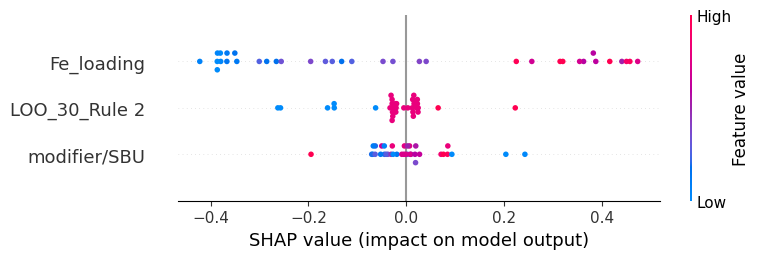

In [10]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from rdkit import Chem
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import shap

DIR = '/home/lnh/GPT_GE/agent_ml/yield_o1'
all_smiles = list(pd.read_csv("agent/data/data.csv")['SMILES'])

all_best_features = pd.DataFrame({
    'Index':[x for x in range(1,37)]
})
# _ = 1
for _ in range(1, 37):
    print(f'LOO {_}')
    folder = os.path.join(DIR,str(_))
    code_file = os.path.join(folder,"best_rule_code.txt")
    with open(code_file) as f:
        code = f.read()
    exec(code, globals())
    df = rule2matrix(all_smiles) # type: ignore
    selected_train_matrix = pd.read_csv(os.path.join(folder,'best_train_matrix.csv'))
    selected_test_matrix = pd.read_csv(os.path.join(folder,'best_test_matrix.csv'))
    # # model_cla = ExtraTreesClassifier(n_estimators=500, random_state=seed,n_jobs=64)
    selected_rules = list(selected_train_matrix.columns.values)
    df = df[selected_rules]
    # print(selected_rules)
    rule_title = ['LOO_'+str(_)+"_"+x for x in selected_train_matrix.columns.values]
    df.columns = rule_title
    all_best_features = pd.concat([all_best_features,df],axis=1)

# Load all the o1-generated features
all_best_features = all_best_features.iloc[:,1:]


# Load the dataset
dataset = pd.read_csv("agent/data/data.csv")


# Read the feature names back into a list
with open('o1_rules_SHAP_value/top_20_shap_features.txt', 'r') as f:
    top_20_features_from_file = [line.strip() for line in f]
top_20_features_data = all_best_features[top_20_features_from_file]

# feature = pd.concat([feature,top_20_features_data.iloc[:, :4]],axis=1)

# Load features and target data
features = pd.read_csv("agent/data/all_targets.csv")[['Fe_loading', 'modifier/SBU']]
features = pd.concat([features,top_20_features_data[['LOO_30_Rule 2']]],axis=1)
target = pd.read_csv("agent/data/all_targets.csv")[['yield_cla']]

# Initialize model
model_cla = RandomForestClassifier(n_estimators=500, max_depth=3, max_features=None,random_state=42, n_jobs=64)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize list to hold SHAP values
shap_values_list = []
train_accuracy_all = []
test_accuracy_all = []
# Perform Leave-One-Out and calculate SHAP values
for train_index, test_index in loo.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    model_cla.fit(X_train, y_train.values.ravel())
    
    y_train_pred = model_cla.predict(X_train)
    # Predict on the test set
    y_pred = model_cla.predict(X_test)
    # Evaluate the model
    train_acc = accuracy_score(y_train, y_train_pred)
    
    test_acc = accuracy_score(y_test, y_pred)
    
    train_accuracy_all.append(train_acc)
    test_accuracy_all.append(test_acc)

    
    # Use SHAP to calculate the SHAP values for the test sample
    explainer = shap.TreeExplainer(model_cla)
    shap_values = explainer.shap_values(X_test)
    
    # Store SHAP values for the test sample
    shap_values_list.append(shap_values)


print("Train Accuracy:", np.mean(train_accuracy_all))
print("-"*100)
print("Test Accuracy:", np.mean(test_accuracy_all))
print("-"*100)

# Flatten list of SHAP values (since we calculated them for binary classification)
shap_values_array = np.concatenate(shap_values_list, axis=0)

# Plot the SHAP values for one test sample (as an example)

shap.summary_plot(shap_values_array[:,:,1], features)

# test_sample_index = 0  # Change this to any index you want to visualize
# # Plot the SHAP values for a single test observation, you may need to loop through to find a particular sample's SHAP value
# shap.force_plot(explainer.expected_value[1], shap_values_array[1][test_sample_index], features.iloc[test_sample_index], matplotlib=True)
# plt.show()

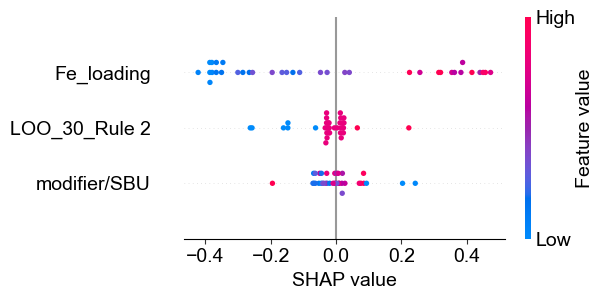

In [11]:
from shap.plots import colors
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm
font_path = "ARIAL.TTF"  # Update the path to your font file
font_prop = FontProperties(fname=font_path, size=15)
shap.summary_plot(shap_values_array[:,:,1], features,show=False,plot_size=(6,3),color_bar=False)

ax = plt.gca()
# Adjust scatter size by updating the collections
for collection in ax.collections:
    if hasattr(collection, 'set_sizes'):
        # Adjust scatter point size (currently fitting imaginary variable fontsize)
        collection.set_sizes([15])  # Set to desired size, this line applies uniformly

#set the color
m = cm.ScalarMappable(cmap=colors.red_blue)
m.set_array([0, 1])
cb = plt.colorbar(m,ticks=[0, 1], aspect=40,shrink=1.0)
#set the tick
cb.set_ticklabels(["Low", "High"],fontsize=14,color='black',fontproperties=font_prop)
#Set the lable on the color bar
cb.set_label("Feature value", fontsize=14, labelpad=0,color='black',fontproperties=font_prop)
cb.ax.tick_params(labelsize=14, length=0)
#set the transparency
cb.set_alpha(1)
cb.outline.set_visible(False)


plt.xticks(fontsize=14,color='black',fontproperties=font_prop)
plt.yticks(fontsize=14,color='black',fontproperties=font_prop) 
plt.xlabel('SHAP value',fontsize=14,fontproperties=font_prop)
# plt.title('SHAP for traditional descriptors',fontsize=20,fontproperties=font_prop,weight='bold')
#save figure
plt.savefig('Figures/SHAP_o1nexp.png',dpi = 800,bbox_inches='tight')
# plt.show()

Train Accuracy: 0.9722222222222219
----------------------------------------------------------------------------------------------------
Test Accuracy: 0.8611111111111112
----------------------------------------------------------------------------------------------------


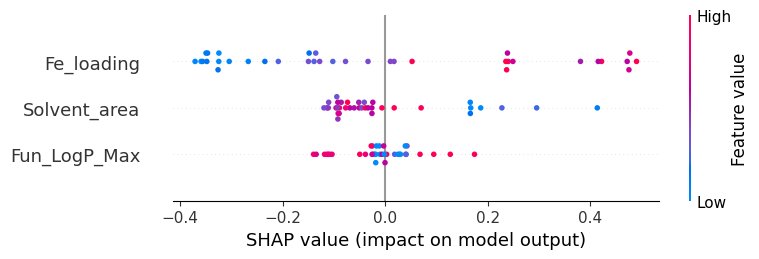

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load traditional and experimental features
features = pd.read_csv("agent/data/del_and_exp_features.csv")[['Fun_LogP_Max', 'Fe_loading', 'Solvent_area']]
target = pd.read_csv("agent/data/all_targets.csv")[['yield_cla']]

# Initialize model
model_cla = RandomForestClassifier(n_estimators=500, max_depth=3, max_features=None,random_state=42, n_jobs=64)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize list to hold SHAP values
shap_values_list = []
train_accuracy_all = []
test_accuracy_all = []
# Perform Leave-One-Out and calculate SHAP values
for train_index, test_index in loo.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    model_cla.fit(X_train, y_train.values.ravel())
    
    y_train_pred = model_cla.predict(X_train)
    # Predict on the test set
    y_pred = model_cla.predict(X_test)
    # Evaluate the model
    train_acc = accuracy_score(y_train, y_train_pred)
    
    test_acc = accuracy_score(y_test, y_pred)
    
    train_accuracy_all.append(train_acc)
    test_accuracy_all.append(test_acc)

    
    # Use SHAP to calculate the SHAP values for the test sample
    explainer = shap.TreeExplainer(model_cla)
    shap_values = explainer.shap_values(X_test)
    
    # Store SHAP values for the test sample
    shap_values_list.append(shap_values)


print("Train Accuracy:", np.mean(train_accuracy_all))
print("-"*100)
print("Test Accuracy:", np.mean(test_accuracy_all))
print("-"*100)

# Flatten list of SHAP values (since we calculated them for binary classification)
shap_values_array = np.concatenate(shap_values_list, axis=0)

# Plot the SHAP values for one test sample (as an example)

shap.summary_plot(shap_values_array[:,:,1], features)

# test_sample_index = 0  # Change this to any index you want to visualize
# # Plot the SHAP values for a single test observation, you may need to loop through to find a particular sample's SHAP value
# shap.force_plot(explainer.expected_value[1], shap_values_array[1][test_sample_index], features.iloc[test_sample_index], matplotlib=True)
# plt.show()

In [4]:
shap_values_array.shape

(36, 3, 2)

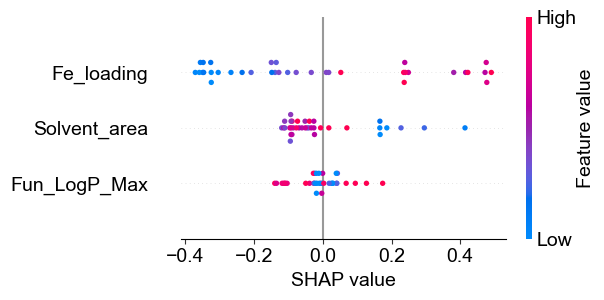

In [ ]:
from shap.plots import colors
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm
font_path = "ARIAL.TTF"  # Update the path to your font file
font_prop = FontProperties(fname=font_path, size=15)
shap.summary_plot(shap_values_array[:,:,1], features,show=False,plot_size=(6,3),color_bar=False)

ax = plt.gca()
# Adjust scatter size by updating the collections
for collection in ax.collections:
    if hasattr(collection, 'set_sizes'):
        # Adjust scatter point size (currently fitting imaginary variable fontsize)
        collection.set_sizes([15])  # Set to desired size, this line applies uniformly

#set the color
m = cm.ScalarMappable(cmap=colors.red_blue)
m.set_array([0, 1])
cb = plt.colorbar(m,ticks=[0, 1], aspect=40,shrink=1.0)
#set the tick
cb.set_ticklabels(["Low", "High"],fontsize=14,color='black',fontproperties=font_prop)
#Set the lable on the color bar
cb.set_label("Feature value", fontsize=14, labelpad=0,color='black',fontproperties=font_prop)
cb.ax.tick_params(labelsize=14, length=0)
#set the transparency
cb.set_alpha(1)
cb.outline.set_visible(False)


plt.xticks(fontsize=14,color='black',fontproperties=font_prop)
plt.yticks(fontsize=14,color='black',fontproperties=font_prop) 
plt.xlabel('SHAP value',fontsize=14,fontproperties=font_prop)
# plt.title('SHAP for traditional descriptors',fontsize=20,fontproperties=font_prop,weight='bold')
#save figure
plt.savefig('Figures/SHAP_tradnexp.png',dpi = 800,bbox_inches='tight')
# plt.show()